# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "GFDL-ESM2G"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/huss_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5890326499938965 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/huss_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.155644178390503 to load the data
*********Start to merge*********
It takes elapsed_time 1.1990563869476318 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.07511401176452637 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.287837982177734 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.651705265045166 to mask the layer
*********Start to plot the layer*********


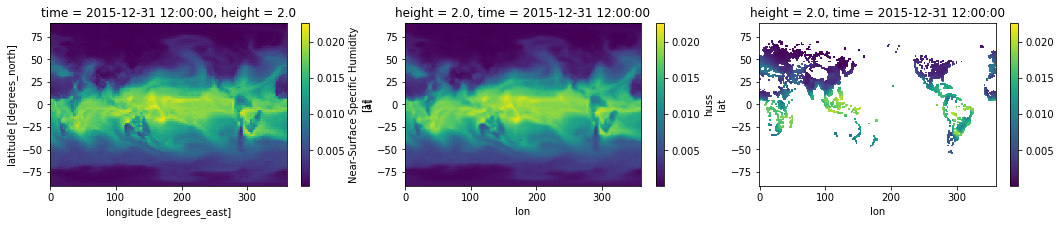

It takes elapsed_time 0.6741476058959961 to plot the layer
It takes elapsed_time 14.045080423355103 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/tas_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.604943037033081 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/tas_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2562768459320068 to load the data
*********Start to merge*********
It takes elapsed_time 1.229964017868042 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026460647583007812 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.236746788024902 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6518270969390869 to mask the layer
*********Start to plot the layer*********


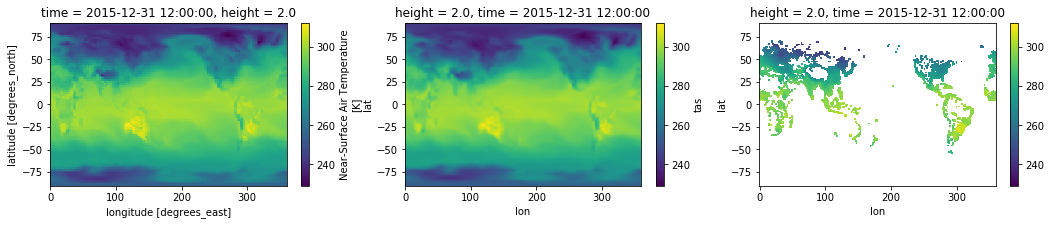

It takes elapsed_time 0.6635251045227051 to plot the layer
It takes elapsed_time 14.065642595291138 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/uas_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6321203708648682 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/uas_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.307159662246704 to load the data
*********Start to merge*********
It takes elapsed_time 1.2421905994415283 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02641463279724121 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.239421129226685 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6519725322723389 to mask the layer
*********Start to plot the layer*********


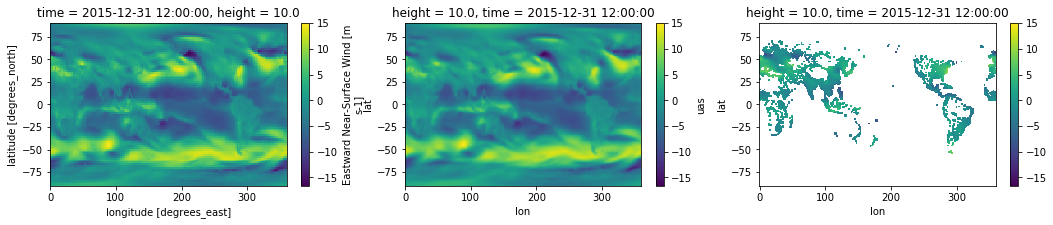

It takes elapsed_time 0.7001504898071289 to plot the layer
It takes elapsed_time 14.16795301437378 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/vas_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5843629837036133 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/vas_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2110300064086914 to load the data
*********Start to merge*********
It takes elapsed_time 1.2909557819366455 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02669358253479004 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.302092552185059 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6527676582336426 to mask the layer
*********Start to plot the layer*********


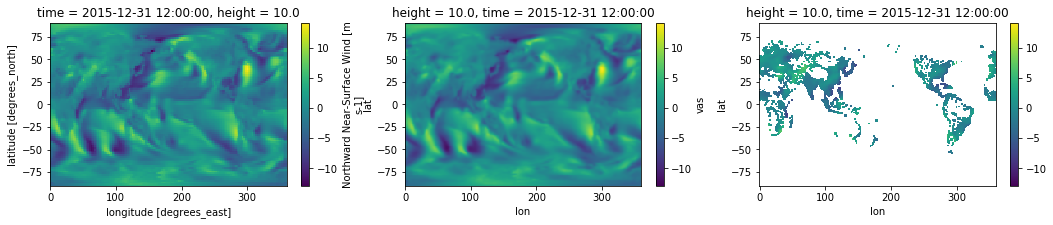

It takes elapsed_time 0.6892476081848145 to plot the layer
It takes elapsed_time 14.173437595367432 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/pr_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6563355922698975 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/pr_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2442116737365723 to load the data
*********Start to merge*********
It takes elapsed_time 1.253636121749878 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026534557342529297 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.27803897857666 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6521434783935547 to mask the layer
*********Start to plot the layer*********


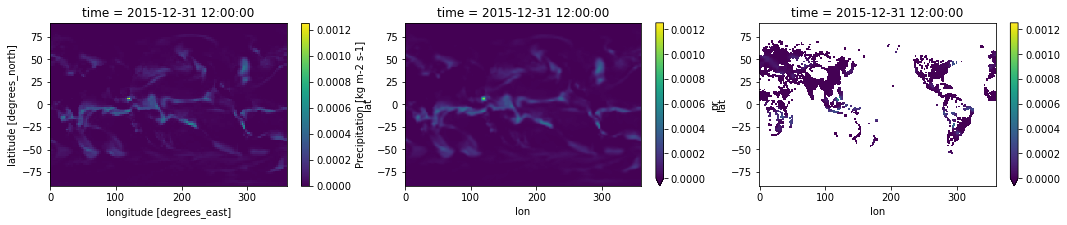

It takes elapsed_time 0.6711320877075195 to plot the layer
It takes elapsed_time 14.126342058181763 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/prsn_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.6224746704101562 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/prsn_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2463781833648682 to load the data
*********Start to merge*********
It takes elapsed_time 1.2200698852539062 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026256084442138672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.276055574417114 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6538183689117432 to mask the layer
*********Start to plot the layer*********


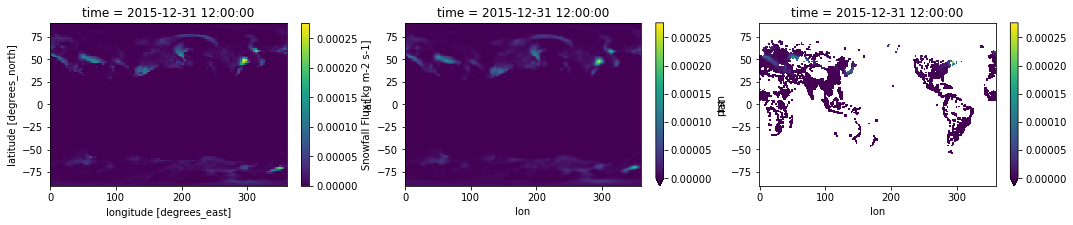

It takes elapsed_time 0.6503348350524902 to plot the layer
It takes elapsed_time 14.073920488357544 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlds_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.7690505981445312 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlds_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.3551619052886963 to load the data
*********Start to merge*********
It takes elapsed_time 1.2392048835754395 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026682138442993164 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.318722009658813 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6697354316711426 to mask the layer
*********Start to plot the layer*********


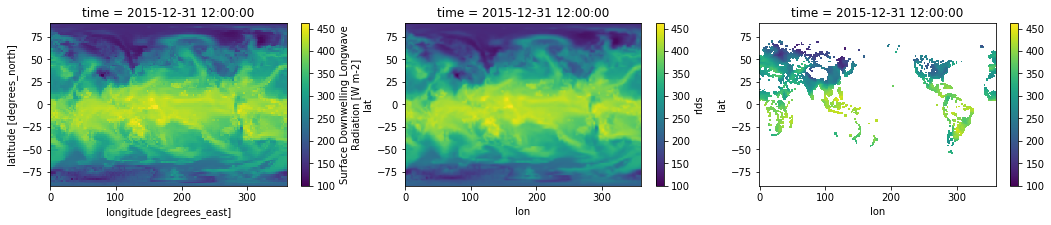

It takes elapsed_time 0.7012338638305664 to plot the layer
It takes elapsed_time 14.31156611442566 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlus_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5972187519073486 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlus_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2212862968444824 to load the data
*********Start to merge*********
It takes elapsed_time 1.2409660816192627 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.026607036590576172 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.272225856781006 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.659456729888916 to mask the layer
*********Start to plot the layer*********


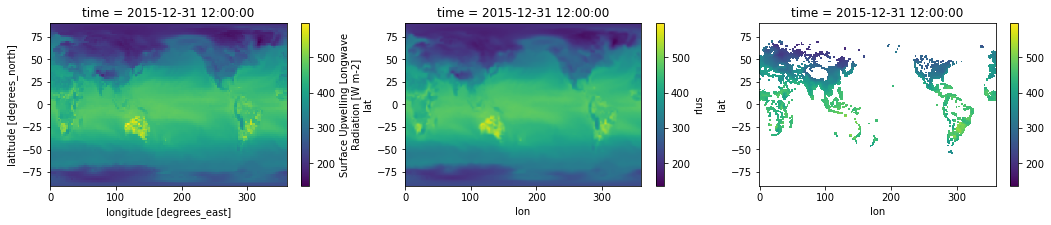

It takes elapsed_time 0.6583867073059082 to plot the layer
It takes elapsed_time 14.079569339752197 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsds_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.677377462387085 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsds_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2668378353118896 to load the data
*********Start to merge*********
It takes elapsed_time 1.246518850326538 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02652430534362793 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.330815076828003 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6604914665222168 to mask the layer
*********Start to plot the layer*********


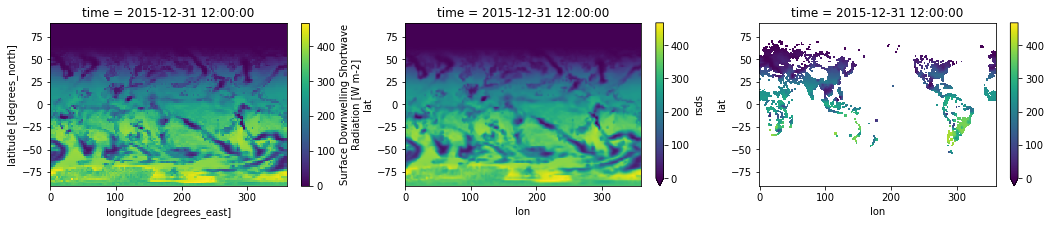

It takes elapsed_time 0.6817684173583984 to plot the layer
It takes elapsed_time 14.21380066871643 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsus_day_GFDL-ESM2G_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5858426094055176 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsus_day_GFDL-ESM2G_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.257695198059082 to load the data
*********Start to merge*********
It takes elapsed_time 1.258934497833252 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.02681899070739746 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.287801504135132 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6635541915893555 to mask the layer
*********Start to plot the layer*********


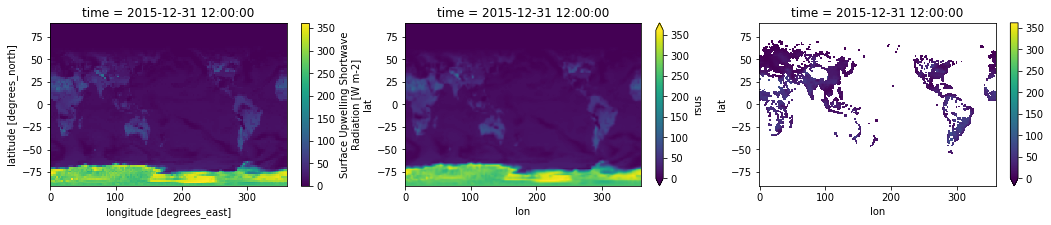

It takes elapsed_time 0.7012784481048584 to plot the layer
It takes elapsed_time 14.196746826171875 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 5)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 29.223825216293335 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

251.6103436946869


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/huss_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6138763427734375 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/huss_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2285964488983154 to load the data
*********Start to merge*********
It takes elapsed_time 1.2413856983184814 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.060060739517211914 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.223668813705444 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6519143581390381 to mask the layer
*********Start to plot the layer*********


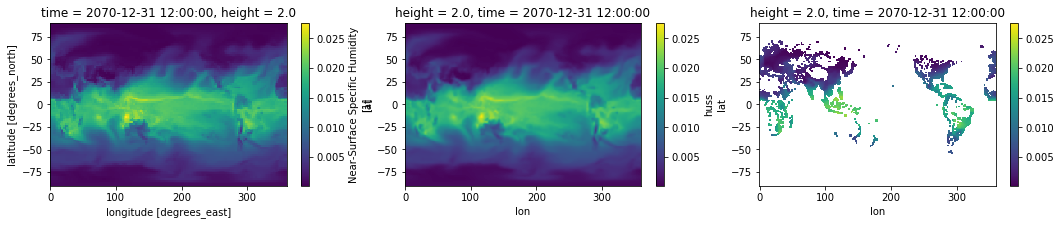

It takes elapsed_time 0.6755368709564209 to plot the layer
It takes elapsed_time 14.082507371902466 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/tas_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.582106351852417 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/tas_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.3007910251617432 to load the data
*********Start to merge*********
It takes elapsed_time 1.3149948120117188 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.028314590454101562 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.308929443359375 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6548988819122314 to mask the layer
*********Start to plot the layer*********


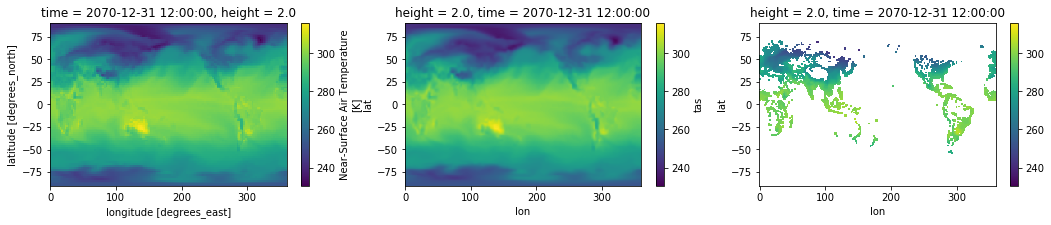

It takes elapsed_time 0.6647379398345947 to plot the layer
It takes elapsed_time 14.273551225662231 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/uas_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6110427379608154 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/uas_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2556116580963135 to load the data
*********Start to merge*********
It takes elapsed_time 1.2702038288116455 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027237892150878906 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.275178909301758 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6646575927734375 to mask the layer
*********Start to plot the layer*********


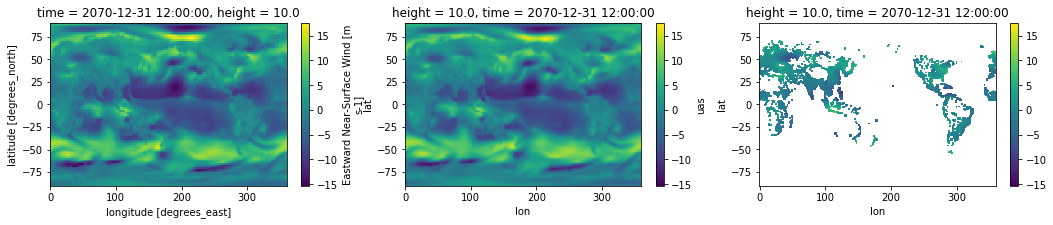

It takes elapsed_time 0.7156627178192139 to plot the layer
It takes elapsed_time 14.2094247341156 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/vas_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6245865821838379 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/vas_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2898836135864258 to load the data
*********Start to merge*********
It takes elapsed_time 1.2939527034759521 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027437210083007812 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.292167901992798 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6642260551452637 to mask the layer
*********Start to plot the layer*********


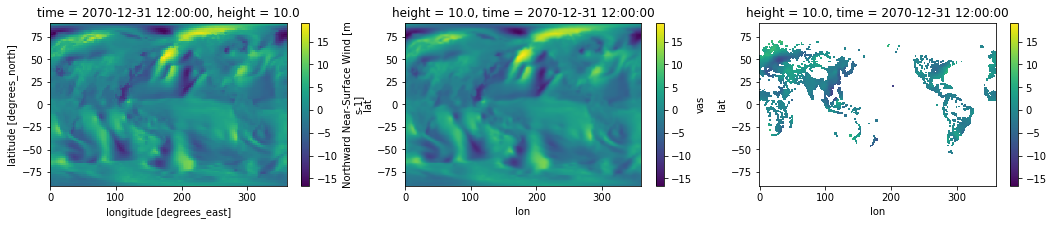

It takes elapsed_time 0.727470874786377 to plot the layer
It takes elapsed_time 14.296005010604858 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/pr_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6464180946350098 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/pr_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.312859058380127 to load the data
*********Start to merge*********
It takes elapsed_time 1.27457857131958 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027264833450317383 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.289438724517822 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6676983833312988 to mask the layer
*********Start to plot the layer*********


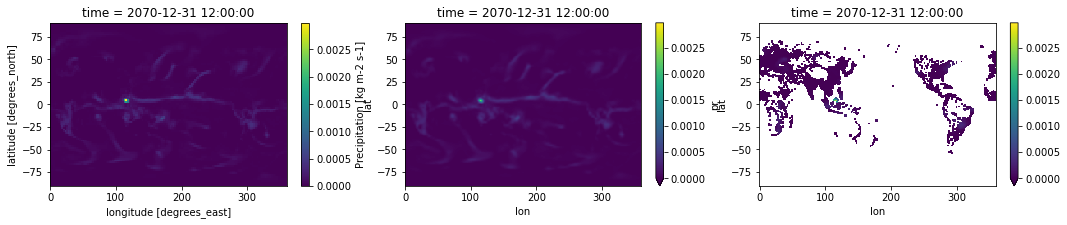

It takes elapsed_time 0.6759860515594482 to plot the layer
It takes elapsed_time 14.248908758163452 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/prsn_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6073830127716064 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/prsn_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2461271286010742 to load the data
*********Start to merge*********
It takes elapsed_time 1.301520824432373 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027446746826171875 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.262733697891235 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6661672592163086 to mask the layer
*********Start to plot the layer*********


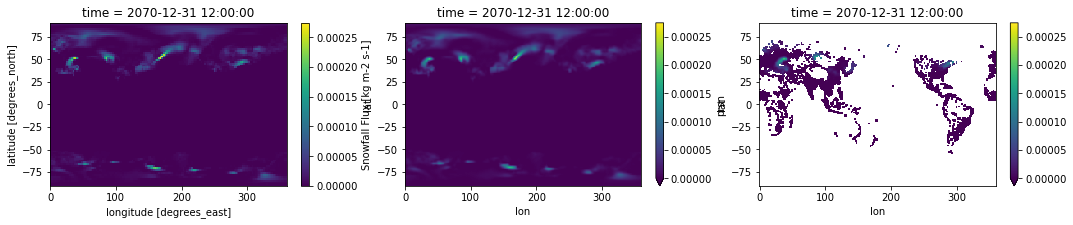

It takes elapsed_time 0.6717650890350342 to plot the layer
It takes elapsed_time 14.17666220664978 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlds_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.7696011066436768 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlds_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.4061825275421143 to load the data
*********Start to merge*********
It takes elapsed_time 1.271348476409912 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.0559077262878418 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.246528387069702 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6654841899871826 to mask the layer
*********Start to plot the layer*********


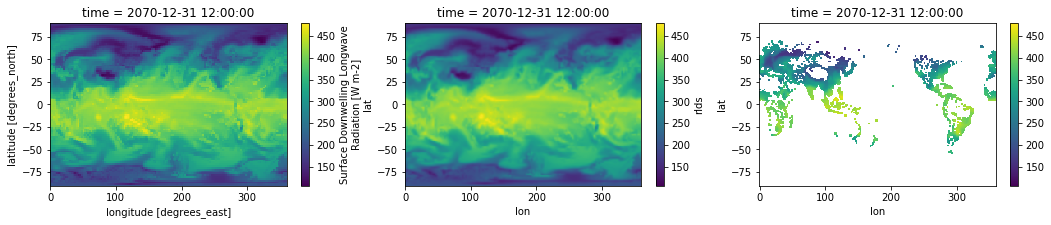

It takes elapsed_time 0.716494083404541 to plot the layer
It takes elapsed_time 14.362797737121582 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlus_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6986067295074463 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rlus_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.2982947826385498 to load the data
*********Start to merge*********
It takes elapsed_time 1.2691292762756348 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027310848236083984 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.252665758132935 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.666795015335083 to mask the layer
*********Start to plot the layer*********


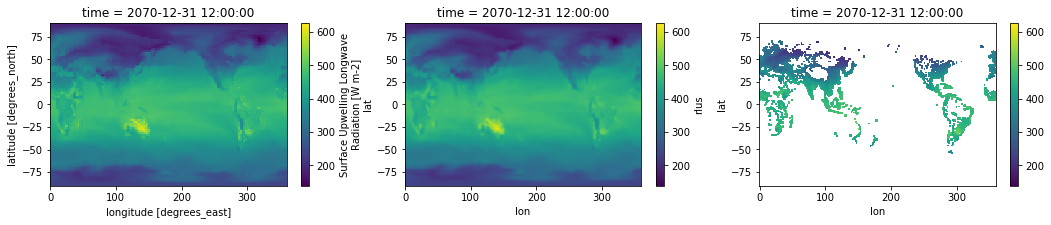

It takes elapsed_time 0.6905584335327148 to plot the layer
It takes elapsed_time 14.2054123878479 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsds_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6816713809967041 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsds_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.3429927825927734 to load the data
*********Start to merge*********
It takes elapsed_time 1.2582645416259766 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027816295623779297 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.26234769821167 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6649975776672363 to mask the layer
*********Start to plot the layer*********


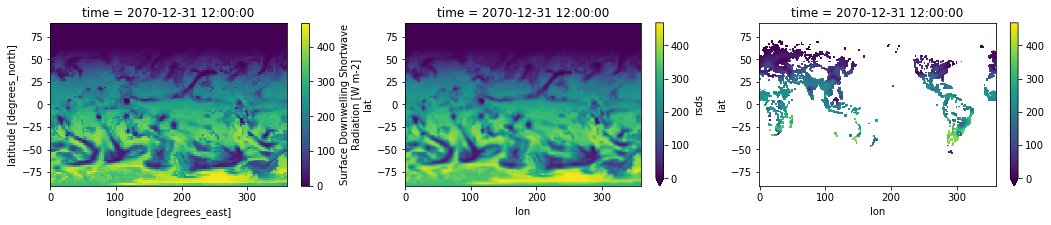

It takes elapsed_time 0.6906225681304932 to plot the layer
It takes elapsed_time 14.247697591781616 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsus_day_GFDL-ESM2G_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.6234860420227051 to load the data
/glade/scratch/zhonghua/CMIP5/GFDL-ESM2G/rsus_day_GFDL-ESM2G_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.233126163482666 to load the data
*********Start to merge*********
It takes elapsed_time 1.2868409156799316 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_90x144_192x288_peri.nc
It takes elapsed_time 0.027454853057861328 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 10.24316668510437 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6649339199066162 to mask the layer
*********Start to plot the layer*********


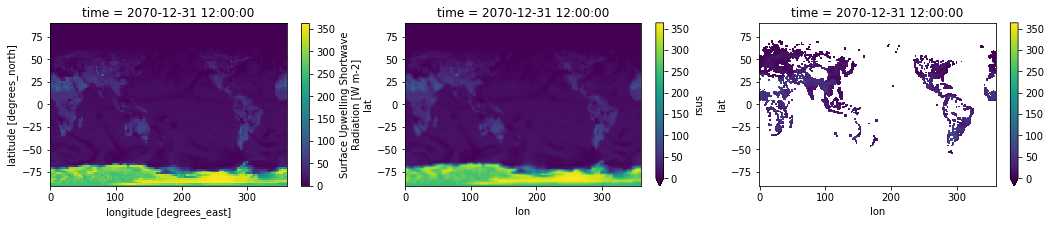

It takes elapsed_time 0.7109847068786621 to plot the layer
It takes elapsed_time 14.167400598526001 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2061, 2071, 5)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 29.711559295654297 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

250.4791283607483
